<a href="https://colab.research.google.com/github/sakshy222/dip-image-processing/blob/main/dip_practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Image


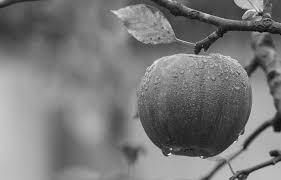

Negative Image


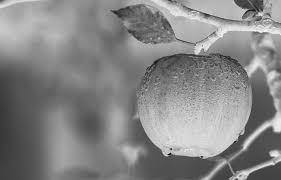

Binary Threshold


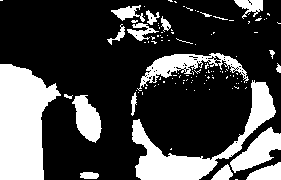

Threshold with Background


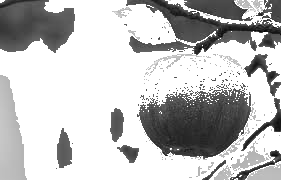

Contrast Stretched Image


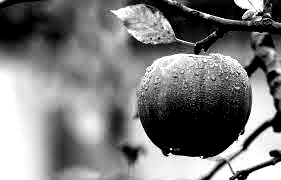

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read image
img = cv2.imread('/content/apple.jpg', 0)

m, n = img.shape

# -------- Image Negative --------
L = img.max()
img_neg = L - img

# -------- Binary Thresholding --------
T = 150
img_thresh = np.zeros((m, n), dtype=np.uint8)

for i in range(m):
    for j in range(n):
        if img[i, j] < T:
            img_thresh[i, j] = 0
        else:
            img_thresh[i, j] = 255

# -------- Thresholding with Background --------
T1 = 100
T2 = 180
img_thresh_back = np.zeros((m, n), dtype=np.uint8)

for i in range(m):
    for j in range(n):
        if T1 < img[i, j] < T2:
            img_thresh_back[i, j] = 255
        else:
            img_thresh_back[i, j] = img[i, j]

# -------- Contrast Stretching --------
r1, s1 = 70, 0
r2, s2 = 180, 255

img_cs = np.zeros((m, n), dtype=np.uint8)

for i in range(m):
    for j in range(n):
        r = img[i, j]
        if r <= r1:
            img_cs[i, j] = (s1 / r1) * r
        elif r <= r2:
            img_cs[i, j] = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
        else:
            img_cs[i, j] = ((255 - s2) / (255 - r2)) * (r - r2) + s2

# -------- Display All Images --------
print("Original Image")
cv2_imshow(img)

print("Negative Image")
cv2_imshow(img_neg)

print("Binary Threshold")
cv2_imshow(img_thresh)

print("Threshold with Background")
cv2_imshow(img_thresh_back)

print("Contrast Stretched Image")
cv2_imshow(img_cs)
